# 1

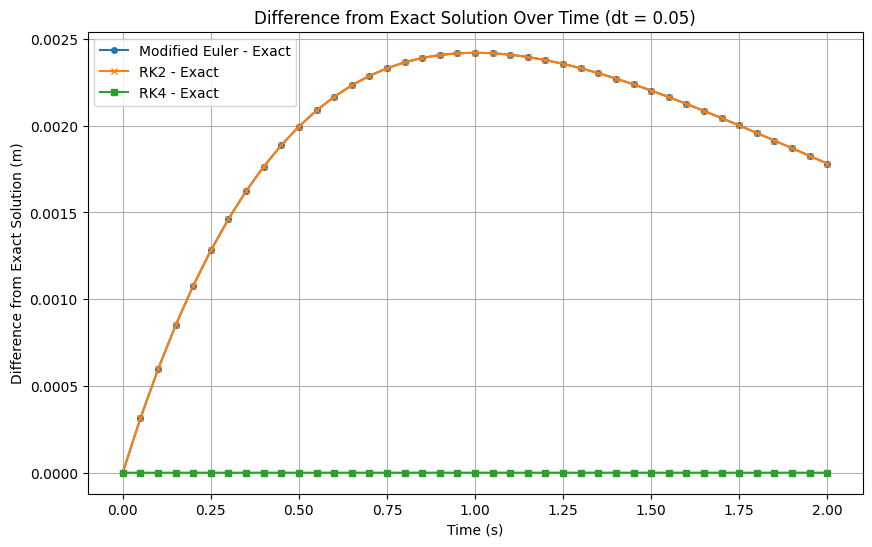

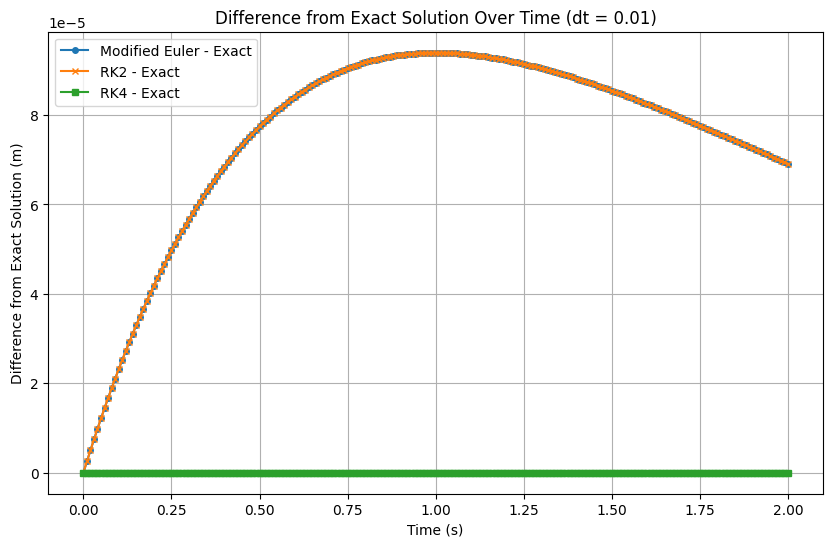

In [9]:
import numpy as np
import matplotlib.pyplot as plt

g = 10
m = 1.0
gamma = 1.0
vx0 = 2.5
vy0 = 5.0
x0 = 0.0
y0 = 0.0
tau = m / gamma

t_end = 2.0
dt_values = [0.05, 0.01]

def Fx(vx, vy):
    return -gamma * vx

def Fy(vx, vy):
    return -gamma * vy - m * g

def exact_x(t):
    return vx0 * tau * (1 - np.exp(-t / tau))

def exact_y(t):
    return -g * tau * t + tau * (g * tau + vy0) * (1 - np.exp(-t / tau))

def modified_euler(x0, y0, vx0, vy0, dt, t_end):
    n = int(t_end / dt) + 1
    x, y = np.zeros(n), np.zeros(n)
    vx, vy = np.zeros(n), np.zeros(n)
    x[0], y[0], vx[0], vy[0] = x0, y0, vx0, vy0

    for i in range(n-1):
        k1x, k1y = dt * vx[i], dt * vy[i]
        k1vx, k1vy = dt * Fx(vx[i], vy[i]) / m, dt * Fy(vx[i], vy[i]) / m

        vx_pred = vx[i] + k1vx
        vy_pred = vy[i] + k1vy

        k2x, k2y = dt * vx_pred, dt * vy_pred
        k2vx, k2vy = dt * Fx(vx_pred, vy_pred) / m, dt * Fy(vx_pred, vy_pred) / m

        vx[i+1] = vx[i] + 0.5 * (k1vx + k2vx)
        vy[i+1] = vy[i] + 0.5 * (k1vy + k2vy)
        x[i+1] = x[i] + 0.5 * (k1x + k2x)
        y[i+1] = y[i] + 0.5 * (k1y + k2y)

    return x, y

def rk2(x0, y0, vx0, vy0, dt, t_end):
    n = int(t_end / dt) + 1
    x, y = np.zeros(n), np.zeros(n)
    vx, vy = np.zeros(n), np.zeros(n)
    x[0], y[0], vx[0], vy[0] = x0, y0, vx0, vy0

    for i in range(n-1):
        k1x, k1y = dt * vx[i], dt * vy[i]
        k1vx, k1vy = dt * Fx(vx[i], vy[i]) / m, dt * Fy(vx[i], vy[i]) / m

        vx_half = vx[i] + 0.5 * k1vx
        vy_half = vy[i] + 0.5 * k1vy

        k2x, k2y = dt * vx_half, dt * vy_half
        k2vx, k2vy = dt * Fx(vx_half, vy_half) / m, dt * Fy(vx_half, vy_half) / m

        vx[i+1] = vx[i] + k2vx
        vy[i+1] = vy[i] + k2vy
        x[i+1] = x[i] + k2x
        y[i+1] = y[i] + k2y

    return x, y

    return np.array([]), np.array([])

def rk4(x0, y0, vx0, vy0, dt, t_end):
    n = int(t_end / dt) + 1
    x, y = np.zeros(n), np.zeros(n)
    vx, vy = np.zeros(n), np.zeros(n)
    x[0], y[0], vx[0], vy[0] = x0, y0, vx0, vy0

    for i in range(n-1):
        k1x, k1y = dt * vx[i], dt * vy[i]
        k1vx, k1vy = dt * Fx(vx[i], vy[i]) / m, dt * Fy(vx[i], vy[i]) / m

        k2x, k2y = dt * (vx[i] + 0.5 * k1vx), dt * (vy[i] + 0.5 * k1vy)
        k2vx, k2vy = dt * Fx(vx[i] + 0.5 * k1vx, vy[i] + 0.5 * k1vy) / m, dt * Fy(vx[i] + 0.5 * k1vx, vy[i] + 0.5 * k1vy) / m

        k3x, k3y = dt * (vx[i] + 0.5 * k2vx), dt * (vy[i] + 0.5 * k2vy)
        k3vx, k3vy = dt * Fx(vx[i] + 0.5 * k2vx, vy[i] + 0.5 * k2vy) / m, dt * Fy(vx[i] + 0.5 * k2vx, vy[i] + 0.5 * k2vy) / m

        k4x, k4y = dt * (vx[i] + k3vx), dt * (vy[i] + k3vy)
        k4vx, k4vy = dt * Fx(vx[i] + k3vx, vy[i] + k3vy) / m, dt * Fy(vx[i] + k3vx, vy[i] + k3vy) / m

        vx[i+1] = vx[i] + (k1vx + 2*k2vx + 2*k3vx + k4vx) / 6
        vy[i+1] = vy[i] + (k1vy + 2*k2vy + 2*k3vy + k4vy) / 6
        x[i+1] = x[i] + (k1x + 2*k2x + 2*k3x + k4x) / 6
        y[i+1] = y[i] + (k1y + 2*k2y + 2*k3y + k4y) / 6

    return x, y

    return np.array([]), np.array([])

for dt in dt_values:
    t_values = np.arange(0, t_end + dt, dt)
    exact_positions_x = exact_x(t_values)
    exact_positions_y = exact_y(t_values)

    # Modified Euler
    x_euler, y_euler = modified_euler(x0, y0, vx0, vy0, dt, t_end)
    euler_diff = np.sqrt((x_euler - exact_positions_x)**2 + (y_euler - exact_positions_y)**2)

    # RK2
    x_rk2, y_rk2 = rk2(x0, y0, vx0, vy0, dt, t_end)
    rk2_diff = np.sqrt((x_rk2 - exact_positions_x)**2 + (y_rk2 - exact_positions_y)**2)

    # RK4
    x_rk4, y_rk4 = rk4(x0, y0, vx0, vy0, dt, t_end)
    rk4_diff = np.sqrt((x_rk4 - exact_positions_x)**2 + (y_rk4 - exact_positions_y)**2)

    # Plot
    plt.figure(figsize=(10, 6))
    plt.plot(t_values, euler_diff, label='Modified Euler - Exact', linestyle='-', marker='o', markersize=4)
    plt.plot(t_values, rk2_diff, label='RK2 - Exact', linestyle='-', marker='x', markersize=4)
    plt.plot(t_values, rk4_diff, label='RK4 - Exact', linestyle='-', marker='s', markersize=4)
    plt.title(f'Difference from Exact Solution Over Time (dt = {dt})')
    plt.xlabel('Time (s)')
    plt.ylabel('Difference from Exact Solution (m)')
    plt.legend()
    plt.grid(True)
    plt.show()

# 2

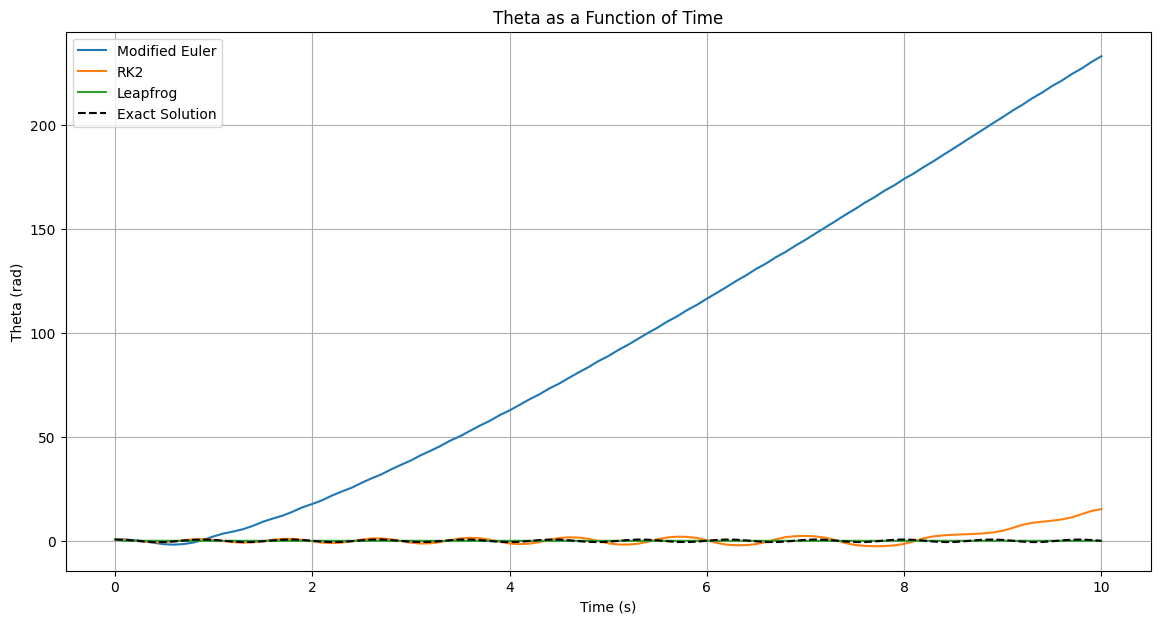

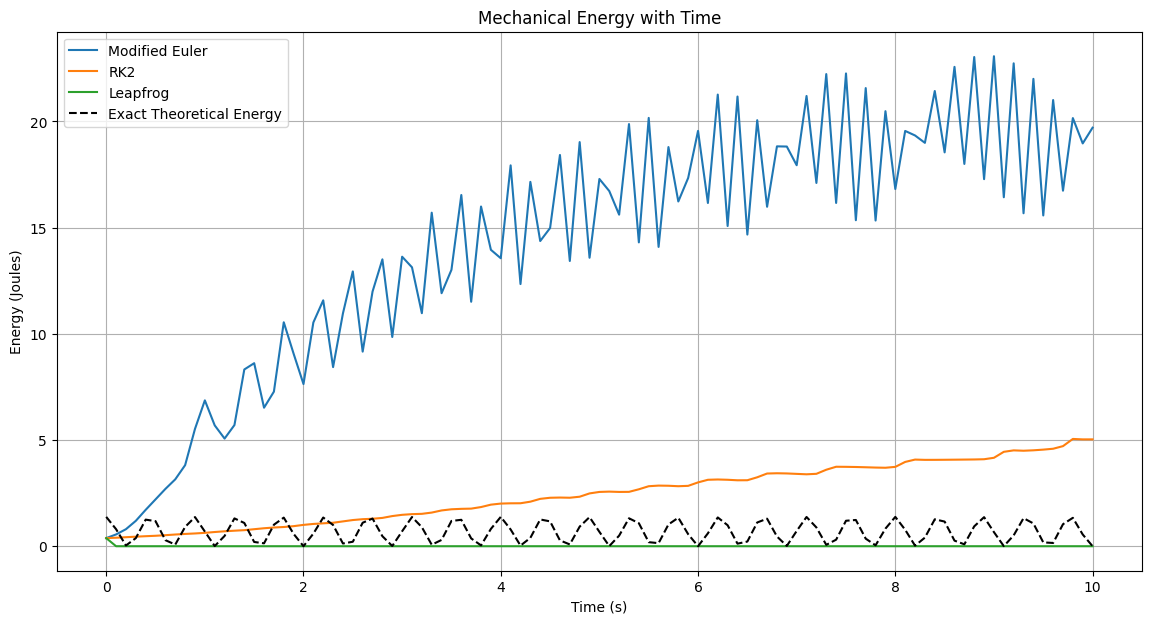

In [12]:
g = 10
l = 0.2
m = 1.0
theta0 = np.pi / 5
omega0 = 0
t_f = 10
dt = 0.1

def dtheta_dt(omega):
    return omega

def domega_dt(theta):
    return -(g / l) * np.sin(theta)

def exact_theta(t):
    return theta0 * np.sin(np.sqrt(g / l) * t + np.pi / 2)

def mechanical_energy(theta, omega):
    potential_energy = m * g * l * (1 - np.cos(theta))
    kinetic_energy = 0.5 * m * (l * omega)**2
    return kinetic_energy + potential_energy

t = np.arange(0, t_f + dt, dt)
n = len(t)

theta_euler = np.zeros(n)
omega_euler = np.zeros(n)
theta_rk2 = np.zeros(n)
omega_rk2 = np.zeros(n)
theta_leapfrog = np.zeros(n)
omega_leapfrog = np.zeros(n)

theta_euler[0], omega_euler[0] = theta0, omega0
theta_rk2[0], omega_rk2[0] = theta0, omega0
theta_leapfrog[0], omega_leapfrog[0] = theta0, omega0

theta_leapfrog_corrected = np.zeros(n)
omega_leapfrog_corrected = np.zeros(n)
theta_leapfrog_corrected[0] = theta0
omega_leapfrog_corrected[0] = omega0

omega_half = omega_leapfrog_corrected[0] + 0.5 * dt * domega_dt(theta_leapfrog_corrected[0])

for i in range(n - 1):
    theta_euler[i + 1] = theta_euler[i] + dt * dtheta_dt(omega_euler[i])
    omega_euler[i + 1] = omega_euler[i] + dt * domega_dt(theta_euler[i])

for i in range(n - 1):
    k1_theta = dt * dtheta_dt(omega_rk2[i])
    k1_omega = dt * domega_dt(theta_rk2[i])

    k2_theta = dt * dtheta_dt(omega_rk2[i] + 0.5 * k1_omega)
    k2_omega = dt * domega_dt(theta_rk2[i] + 0.5 * k1_theta)

    theta_rk2[i + 1] = theta_rk2[i] + k2_theta
    omega_rk2[i + 1] = omega_rk2[i] + k2_omega

for i in range(n - 1):
    theta_leapfrog_corrected[i + 1] = theta_leapfrog_corrected[i] + dt * omega_half
    omega_new_half = omega_half + dt * domega_dt(theta_leapfrog_corrected[i + 1])
    omega_leapfrog_corrected[i + 1] = 0.5 * (omega_half + omega_new_half)
    omega_half = omega_new_half


# Mechanical enerergy
energy_euler = mechanical_energy(theta_euler, omega_euler)
energy_rk2 = mechanical_energy(theta_rk2, omega_rk2)
energy_leapfrog = mechanical_energy(theta_leapfrog, omega_leapfrog)

# Comparison
exact_theta_values = exact_theta(t)
exact_energy = mechanical_energy(exact_theta_values, np.sqrt(g/l) * np.cos(np.sqrt(g/l) * t))

plt.figure(figsize=(14, 7))
plt.plot(t, theta_euler, label='Modified Euler')
plt.plot(t, theta_rk2, label='RK2')
plt.plot(t, theta_leapfrog, label='Leapfrog')
plt.plot(t, exact_theta_values, label='Exact Solution', linestyle='--', color='black')
plt.title('Theta as a Function of Time')
plt.xlabel('Time (s)')
plt.ylabel('Theta (rad)')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(14, 7))
plt.plot(t, energy_euler, label='Modified Euler')
plt.plot(t, energy_rk2, label='RK2')
plt.plot(t, energy_leapfrog, label='Leapfrog')
plt.plot(t, exact_energy, label='Exact Theoretical Energy', linestyle='--', color='black')
plt.title('Mechanical Energy with Time')
plt.xlabel('Time (s)')
plt.ylabel('Energy (Joules)')
plt.legend()
plt.grid(True)
plt.show()

# 3

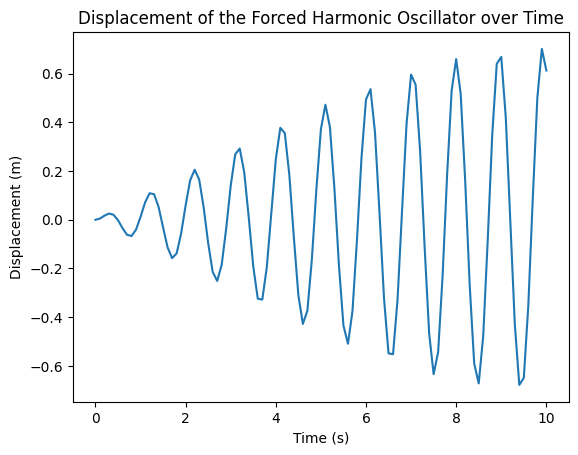

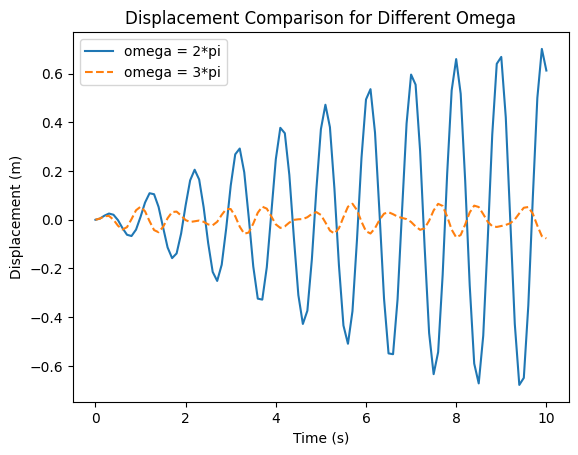

In [14]:
import numpy as np
import matplotlib.pyplot as plt

gamma = 0.1
omega_0 = 2 * np.pi
F_0 = 1
omega = 2 * np.pi
x0 = 0
v0 = 0
t_final = 10
dt = 0.1

def rk2_forced_oscillator(gamma, omega_0, F_0, omega, x0, v0, t_final, dt):
    time = np.arange(0, t_final + dt, dt)
    x = np.zeros(len(time))
    v = np.zeros(len(time))
    x[0], v[0] = x0, v0

    for i in range(len(time) - 1):
        k1_x = v[i]
        k1_v = -2 * gamma * v[i] - omega_0**2 * x[i] + F_0 * np.cos(omega * time[i])

        k2_x = v[i] + dt * k1_v
        k2_v = -2 * gamma * (v[i] + dt * k1_v) - omega_0**2 * (x[i] + dt * k1_x) + F_0 * np.cos(omega * (time[i] + dt))

        x[i + 1] = x[i] + dt * 0.5 * (k1_x + k2_x)
        v[i + 1] = v[i] + dt * 0.5 * (k1_v + k2_v)

    return time, x

t, x = rk2_forced_oscillator(gamma, omega_0, F_0, omega, x0, v0, t_final, dt)

plt.plot(t, x)
plt.xlabel('Time (s)')
plt.ylabel('Displacement (m)')
plt.title('Displacement of the Forced Harmonic Oscillator over Time')
plt.show()

#omega = 3*pi
omega_alt = 3 * np.pi
t_alt, x_alt = rk2_forced_oscillator(gamma, omega_0, F_0, omega_alt, x0, v0, t_final, dt)

plt.plot(t, x, label='omega = 2*pi')
plt.plot(t_alt, x_alt, label='omega = 3*pi', linestyle='--')
plt.xlabel('Time (s)')
plt.ylabel('Displacement (m)')
plt.title('Displacement Comparison for Different Omega')
plt.legend()
plt.show()



# 4-1

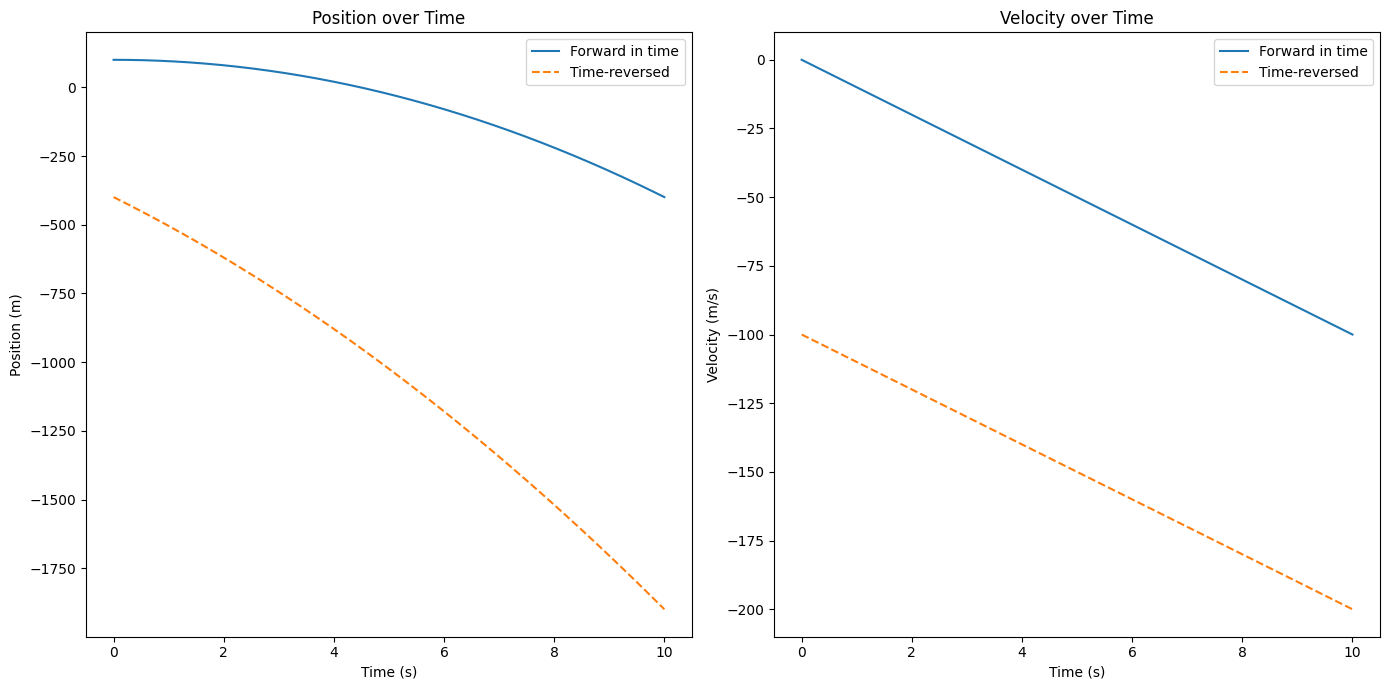

In [21]:
g = 10
x0 = 100
v0 = 0
t_final = 10
dt = 0.01

def euler_free_fall(x0, v0, g, t_final, dt, reverse=False):
    n = int(t_final / abs(dt)) + 1
    t = np.linspace(0, t_final, n)[::-1] if reverse else np.linspace(0, t_final, n)
    x = np.zeros(n)
    v = np.zeros(n)
    x[0], v[0] = x0, v0

    for i in range(n-1):
        if reverse:
            v[i+1] = v[i] + g * dt
            x[i+1] = x[i] - v[i] * dt
        else :
            v[i+1] = v[i] - g * dt
            x[i+1] = x[i] + v[i] * dt

    return t, x, v

t_forward, x_forward, v_forward = euler_free_fall(x0, v0, g, t_final, dt)

_, x_reverse, v_reverse = euler_free_fall(x_forward[-1], -v_forward[-1], g, t_final, dt, reverse=True)

plt.figure(figsize=(14, 7))

# x
plt.subplot(1, 2, 1)
plt.plot(t_forward, x_forward, label='Forward in time')
plt.plot(t_forward, x_reverse, label='Time-reversed', linestyle='--')
plt.xlabel('Time (s)')
plt.ylabel('Position (m)')
plt.title('Position over Time')
plt.legend()

# v
plt.subplot(1, 2, 2)
plt.plot(t_forward, v_forward, label='Forward in time')
plt.plot(t_forward, -v_reverse, label='Time-reversed', linestyle='--')  # Negate for correct comparison
plt.xlabel('Time (s)')
plt.ylabel('Velocity (m/s)')
plt.title('Velocity over Time')
plt.legend()

plt.tight_layout()
plt.show()